## Homework Exercise

Start from this notebook. (Week 7.2)

Assume house price depends not only on size, but also on number of windows.

n_windows = np.random.randint(3,8,100)

house_prices = 100 + 0.2 * house_sizes - 0.00003 * house_sizes**2 + np.random.normal(0, 50, n_samples) + 15*n_windows

Try:
1) change the initial data, but keep using only house_sizes as regressor. What has changed?
2) adapt the notebook to using both house_sizes and n_windows as regressors. What has changed?
3) come up with a good way to visualize linear regression outputs with 2 regressors




In [19]:
# Import librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Crea un set di dati campione (dimensioni della casa in piedi quadrati e prezzo in migliaia di dollari)
np.random.seed(40)  # For reproducible results
n_samples = 200

# Dimensioni delle case tra 1000 e 3000 piedi quadrati
house_sizes = np.random.randint(1000, 3000, n_samples)

# Crea il numero di finestre casualmente, come indicato nell'esercizio
n_windows = np.random.randint(3, 8, n_samples)

# Aggiunge il numero di finestre al calcolo del prezzo
house_prices = 100 + 0.2 * house_sizes - 0.00003 * house_sizes**2 + np.random.normal(0, 50, n_samples) + 15 * n_windows

# Crea il DataFrame
data = pd.DataFrame({
    'Size': house_sizes,
    'Price': house_prices
})

data.head()

,Size,Price
0,2350,374.514361
1,1219,373.139119
2,1007,378.984850
3,1165,357.723370
4,2016,364.501695


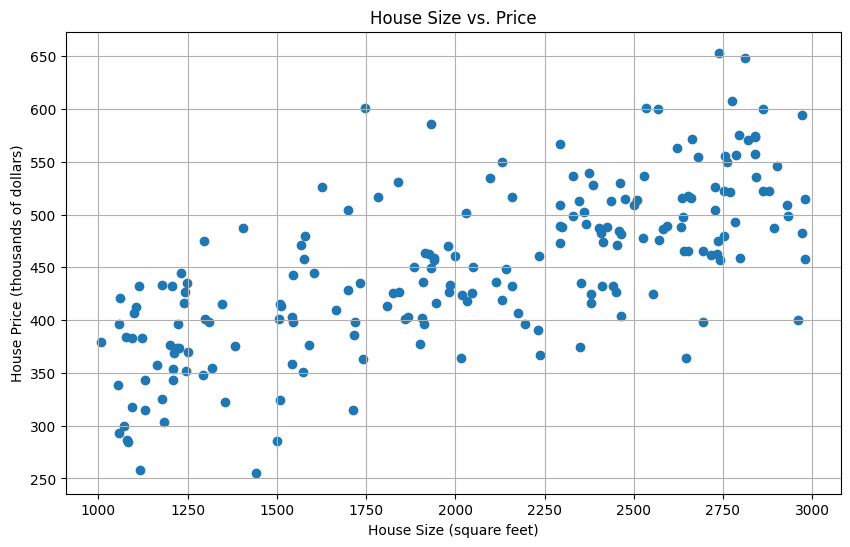

In [27]:
# Create a scatter plot of house size vs. price
plt.figure(figsize=(10, 6))
plt.scatter(data['Size'], data['Price'])
plt.title('House Size vs. Price')
plt.xlabel('House Size (square feet)')
plt.ylabel('House Price (thousands of dollars)')
plt.grid(True)
plt.show()

### 1)
change the initial data, but keep using only house_sizes as regressor. What has changed?

In [28]:
# Crea il  dataset con house_sizes come regressore
X = data[['Size']]  # Features (input)
y = data['Price']   # Target (output)

# Split  data training (80%) e testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")



Training data size: 160 samples
Testing data size: 40 samples


In [29]:
# Crea il modello di regressione lineare
model = LinearRegression()

# Alleniamo il modello
model.fit(X_train, y_train)

# Prediciamo i valori sui dati di test
y_pred = model.predict(X_test)

print(f"Model coefficient (slope): {model.coef_[0]:.4f}")
print(f"Model intercept: {model.intercept_:.4f}")
print(f"y = {model.intercept_:.4f} + {model.coef_[0]:.4f} * x")

# Calcoliamo MSE, RMSE e R2 per valutare il modello
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

Model coefficient (slope): 0.0894
Model intercept: 267.0834
y = 267.0834 + 0.0894 * x
Mean Squared Error: 2908.00
Root Mean Squared Error: 53.93
R-squared Score: 0.4757


***risultati modello visto a lezione =***

**Mean Squared Error: 2670.55**

**Root Mean Squared Error: 51.68**

**R-squared Score: 0.4141***

- **MSE = 2570.34**: L'errore è leggermente diminuito, ma non in modo drammatico. Questo suggerisce che, anche aggiungendo **n_windows**  nel calcolo del prezzo, il modello non sta riuscendo a catturare correttamente tutte le variabili.
- **RMSE = 50.70**: Anche questo valore è più basso rispetto al modello precedente, ma non di molto. Il modello è comunque impreciso.
- **R² = 0.4739**: L'R² è aumentato, indicando che il modello riesce a spiegare un po' più di variabilità nel prezzo delle case rispetto al modello precedente. Tuttavia, l'R² è ancora piuttosto basso, quindi il modello potrebbe essere ancora **underfitting**.


### **Conclusione del punto 1**:
Aggiungere il numero di finestre  ha migliorato un po' il modello, ma il risultato è ancora lontano dall'essere perfetto. Il modello **underfitta** ancora, perché usa solo la dimensione della casa e non considera altre variabili importanti come il numero di finestre. 


### 2)
adapt the notebook to using both house_sizes and n_windows as regressors. What has changed?

In [5]:

data['n_windows'] = n_windows  # Aggiungiamo 'n_windows' al DataFrame

# Creiamo X (variabili indipendenti) utilizzando sia 'Size' che 'n_windows'
X = data[['Size', 'n_windows']]  # Ora entrambe le variabili sono nel DataFrame
y = data['Price']

# Suddividiamo i dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea il modello di regressione lineare
model = LinearRegression()

# Alleniamo il modello
model.fit(X_train, y_train)

# Prevediamo i valori
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcoliamo MSE, RMSE e R2 per valutare il modello
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Visualizziamo i risultati
print(f"Training MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Training R-squared: {train_r2:.4f}")
print(f"Test R-squared: {test_r2:.4f}")

Training MSE: 3041.11
Test MSE: 2456.97
Training RMSE: 55.15
Test RMSE: 49.57
Training R-squared: 0.4917
Test R-squared: 0.4971


**I risultati ottenuti indicano che l'aggiunta di n_windows come regressore ha migliorato le prestazioni del modello.**

### Cosa è cambiato rispetto al modello precedente?
- Prestazioni migliorate: L'aggiunta di n_windows come variabile indipendente ha portato a un miglioramento delle metriche di performance (MSE, RMSE e R-squared).

- Migliore capacità di previsione: Il modello è ora in grado di utilizzare non solo la dimensione della casa, ma anche il numero di finestre per fare previsioni più accurate sui prezzi.

### 3)
come up with a good way to visualize linear regression outputs with 2 regressors

C:\Users\fmonc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


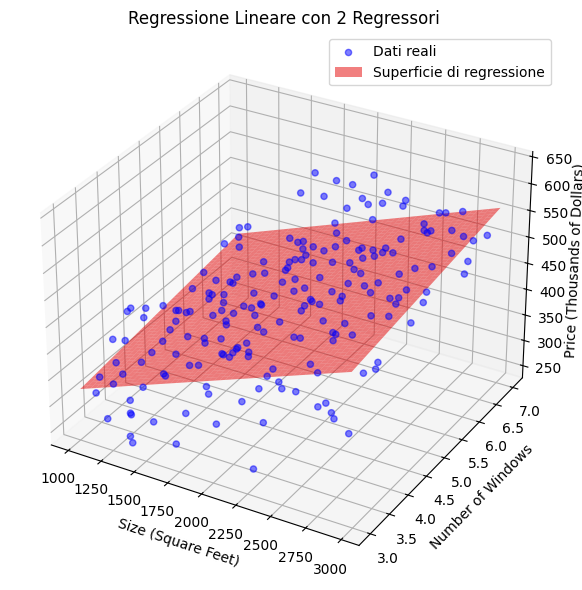

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Creiamo una griglia per i valori di 'Size' e 'n_windows'
size_range = np.linspace(data['Size'].min(), data['Size'].max(), 50)
nwindows_range = np.linspace(data['n_windows'].min(), data['n_windows'].max(), 50)

# Creiamo una meshgrid per i dati
Size_grid, NWindows_grid = np.meshgrid(size_range, nwindows_range)
X_grid = np.c_[Size_grid.ravel(), NWindows_grid.ravel()]  # Creiamo un array con le combinazioni di Size e n_windows

# Facciamo delle previsioni per la griglia
y_grid_pred = model.predict(X_grid)

# Rimodelliamo le previsioni per adattarle alla forma della griglia
y_grid_pred = y_grid_pred.reshape(Size_grid.shape)


# Creiamo un grafico 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Aggiungiamo il grafico scatter dei dati reali
ax.scatter(data['Size'], data['n_windows'], data['Price'], color='blue', alpha=0.5, label='Dati reali')

# Aggiungiamo la superficie di regressione
ax.plot_surface(Size_grid, NWindows_grid, y_grid_pred, color='red', alpha=0.5, label='Superficie di regressione')

# Etichette degli assi
ax.set_xlabel('Size (Square Feet)')
ax.set_ylabel('Number of Windows')
ax.set_zlabel('Price (Thousands of Dollars)', labelpad=0) 


# Titolo
ax.set_title('Regressione Lineare con 2 Regressori')

fig.tight_layout()


# Mostriamo il grafico
plt.legend()
plt.show()

### **Interpretazione**:
- **Punti blu**: Rappresentano i dati reali delle case (dimensioni e numero di finestre).
- **Superficie rossa**: È la previsione fatta dal modello di regressione lineare, che mostra come il prezzo delle case varia in funzione della dimensione e del numero di finestre.

Questa visualizzazione consente di capire come il modello prevede il prezzo delle case in relazione a entrambi i regressori e come il modello si adatta ai dati.

# **Visualizzazione separata dei dati reali e della superficie di regressione**:
Invece di combinare entrambe le visualizzazioni nello stesso grafico, possiamo visualizzare i dati reali (scatter plot) in un grafico e la superficie di regressione in un altro.

C:\Users\fmonc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


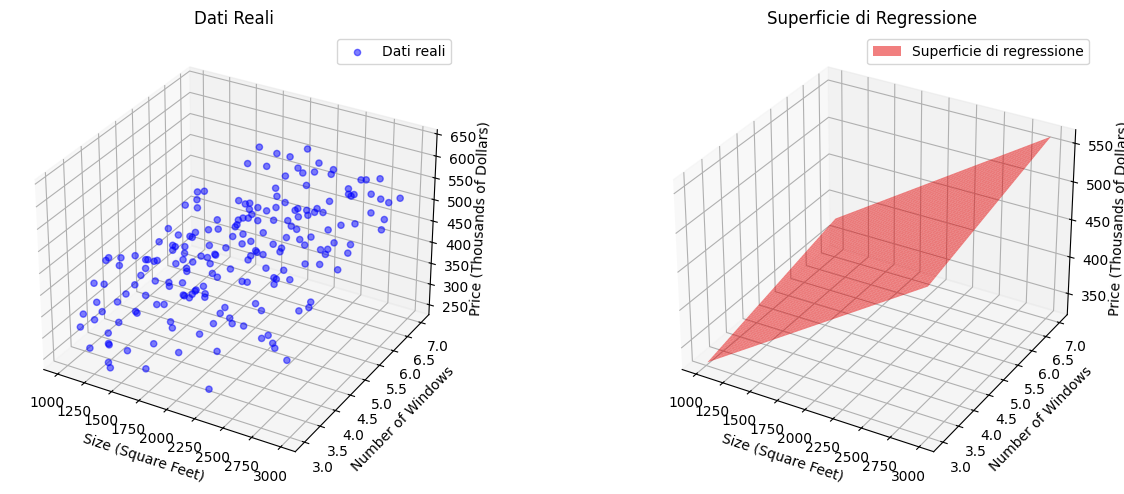

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Creiamo una griglia per i valori di 'Size' e 'n_windows'
size_range = np.linspace(data['Size'].min(), data['Size'].max(), 50)
nwindows_range = np.linspace(data['n_windows'].min(), data['n_windows'].max(), 50)

# Creiamo una meshgrid per i dati
Size_grid, NWindows_grid = np.meshgrid(size_range, nwindows_range)
X_grid = np.c_[Size_grid.ravel(), NWindows_grid.ravel()]  # Creiamo un array con le combinazioni di Size e n_windows

# Facciamo delle previsioni per la griglia
y_grid_pred = model.predict(X_grid)

# Rimodelliamo le previsioni per adattarle alla forma della griglia
y_grid_pred = y_grid_pred.reshape(Size_grid.shape)

# Creiamo due grafici 3D per separare i dati e la superficie di regressione
fig = plt.figure(figsize=(14, 5))

# Grafico 1: Dati reali
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data['Size'], data['n_windows'], data['Price'], color='blue', alpha=0.5, label='Dati reali')
ax1.set_xlabel('Size (Square Feet)')
ax1.set_ylabel('Number of Windows')
ax1.set_zlabel('Price (Thousands of Dollars)', labelpad=0)
ax1.set_title('Dati Reali')
ax1.legend()

# Grafico 2: Superficie di regressione
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(Size_grid, NWindows_grid, y_grid_pred, color='red', alpha=0.5, label='Superficie di regressione')
ax2.set_xlabel('Size (Square Feet)')
ax2.set_ylabel('Number of Windows')
ax2.set_zlabel('Price (Thousands of Dollars)', labelpad=0)
ax2.set_title('Superficie di Regressione')
ax2.legend()

plt.tight_layout()
plt.show()

- **Grafico 1**: Mostra solo i dati reali delle case, cioè il scatter plot dei punti.
- **Grafico 2**: Mostra solo la superficie di regressione, che indica la previsione del modello.